### UAS Deep Learning Case 2
Nama : Patrick Jonathan
NIM : 2440064791

Import semua library yang dibutuhkan

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
# NLTK NLP kit(only so much for our needs)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Dataset yang akan digunakan dan simpan file ke dalam variabel df menggunakan fungsi read_csv yang disediakan library pandas

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset UAS DLO/dataset.csv')

In [ ]:
data.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL


Natural language processing (NLP) adalah cabang dari kecerdasan buatan yang berhubungan dengan interaksi antara komputer dan manusia menggunakan bahasa alami. NLP biasanya digunakan untuk mengukur sentimen dan menentukan bagian mana dari bahasa manusia yang penting. Salah satu teknik NLP yang akan kita gunakan pada dataset ini adalah `Semantics` yang mengacu pada makna yang disampaikan oleh sebuah teks. Analisis ini melibatkan penerapan algoritma komputer untuk memahami arti dan interpretasi kata-kata dan bagaimana kalimat disusun. Pada dataset ini, kita akan mencoba untuk mengukur makna yang disampaikan dari hasil review pengguna. Apakah review tersebut mengandung makna negatif, positif, atau netral. 

Check missing value

In [ ]:
data.isnull().sum()

reviewId                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     5047
at                          0
replyContent            42937
repliedAt               42937
predicted_category          0
sentiment                   0
dtype: int64

Terdapat beberapa missing value pada beberapa variabel `reviewCreatedVersion`, `replyContent`, dan `repliedAt`. Namun hal tersebut tidak perlu kita hiraukan karena kita tidak menggunakan variabel tersebut. 

Variabel yang kita gunakan hanyalah `content` dan `sentiment`. Sehingga kita drop semua kolom yang tidak digunakan.

In [ ]:
data1 = data.drop(['reviewId', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'predicted_category'], axis=1)

In [ ]:
data1.head()

,content,sentiment
0,woww,NEUTRAL
1,let me know more details about this,NEUTRAL
2,i've been using this for a while and there's a...,NEGATIVE
3,good,POSITIVE
4,mjkobe,NEUTRAL


Buat satu variabel bernama `stpwrd` yang menampung semua variabel stopword maupun emotikon

In [ ]:
print(stopwords.words('english'))
emoticons = [":)", ':-)', ': )', ':D', '=)', ':(', ':-(', ': (']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(emoticons)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(stpwrd)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Lakukan kita lakukan preprocessing pada variabel `content` seperti membuang emoji dari data, membuang tulisan berupa url atau link, mengubah semua kata ke dalam bentuk lowercase atau huruf kecil, serta membuang kata-kata yang termasuk ke dalam variabel `stpwrd` yang sudah dibuat sebelumnya, serta mengubah semua kata menjadi kata dasat atau tanpa imbuhan untuk memudahkan kita dalam melakukan interpretasi

In [ ]:
# import regex
import re 

def preprocess_data(data):
  data = data.drop_duplicates(subset=['content'], keep='first')

  # Remove emojis from data
  data = data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

  # Remove urls
  def remove_username_link_nums(text):
    text = re.sub('@[^\s]+', '', text)
    text = re.sub('http[^\s]+', '', text)
    text = re.sub(r'\d+', '', text)
    return text

  data['content'] = data['content'].apply(remove_username_link_nums)

  # # turn text to lowercase
  data['content'] = data['content'].map(lambda x: x.lower())

  # Remove stopwords and lemmatize the text
  lem = WordNetLemmatizer()
  def remove_stopwords(text): 
    tokens = []
    for token in text.split():
      if token not in stpwrd:
        tokens.append(lem.lemmatize(token, "v"))
 
    return  " ".join(tokens)

  data.content = data.content.apply(lambda x: remove_stopwords(x))

  return data

In [ ]:
data2 = preprocess_data(data1)

In [ ]:
data2.head()

,content,sentiment
0,woww,NEUTRAL
1,let know detail,NEUTRAL
2,i've use there's basic bug still fixed. scroll...,NEGATIVE
3,good,POSITIVE
4,mjkobe,NEUTRAL


Selanjutnya, kita dapat melihat kata apa saja yang paling banyak digunakan pada data review ini dengan menggunakan wordcloud

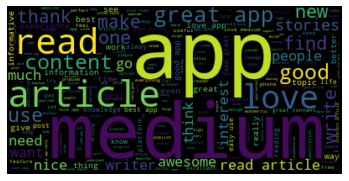

In [ ]:
common_words=''
for i in data2.content:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Kata yang lebih besar dari kata lainnya adalah kata yang paling banyak digunakan dalam data review ini, yaitu medium, app, artice, dan read.


Selanjutnya, kita memberikan label pada variabel target menggunakan 'Label Encoder' dari library 'sklearn'.

In [ ]:
# Encoded the target column
lb=LabelEncoder()
data2['sentiment'] = lb.fit_transform(data2['sentiment'])

Selanjutnya kita lakukan salah satu teknik NLP yaitu Tokenisasi atau mengubah kata-kata review ke dalam bentuk vektor numerik. 

num_words -> Hyperparameter yang mengacu pada jumlah kata yang harus disimpan berdasarkan frekuensi kata.

split -> Hyperparameter yang mengacu pada pemisah yang digunakan untuk memisahkan kata

pad_sequence() -> fungsi yang digunakan untuk mengkonversi sequence data menjadi array NumPy 2D

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data2['content'].values)
X = tokenizer.texts_to_sequences(data2['content'].values)
X = pad_sequences(X)

Selanjutnya kita buat model LSTM yang akan dipakai untuk mengevaluasi NLP

Dengan layer terakhirnya adalah 3 karena kita ingin mengklasifikasikan kata-kata tersebut ke dalam 3 kategori (positif, negatif, netral)

Loss function yang digunakan adalah categorical_crossentropy karena model yang dibuat adalah model klasifikasi kategori

Optimizer yang digunakan adalah 'adam' dan menggunakan 'accuracy' sebagai metrics penilaian

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3 ,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 111, 120)          60000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 111, 120)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 176)               209088    
                                                                 
 dense_1 (Dense)             (None, 3)                 531       
                                                                 
Total params: 269,619
Trainable params: 269,619
Non-trainable params: 0
_________________________________________________________________
None


Kita split data menjadi data training dan testing dengan proporsi 70% untuk training dan 30% untuk testing

In [ ]:
y = pd.get_dummies(data2['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24966, 111)
(10700, 111)
(24966, 3)
(10700, 3)


Lakukan training model dengan jumlah epoch 5, dan batch size yang digunakan adalah 32

In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
781/781 [==============================] - 333s 422ms/step - loss: 0.4925 - accuracy: 0.8057
Epoch 2/5
781/781 [==============================] - 330s 422ms/step - loss: 0.4170 - accuracy: 0.8350
Epoch 3/5
781/781 [==============================] - 328s 419ms/step - loss: 0.4056 - accuracy: 0.8398
Epoch 4/5
781/781 [==============================] - 335s 430ms/step - loss: 0.3969 - accuracy: 0.8437
Epoch 5/5
781/781 [==============================] - 337s 432ms/step - loss: 0.3876 - accuracy: 0.8451


Lalu kita dapat melakukan evaluasi model dengan menggunakan data testing

In [ ]:
model.evaluate(X_test,y_test)

335/335 [==============================] - 29s 83ms/step - loss: 0.4226 - accuracy: 0.8335


[0.42261436581611633, 0.8334579467773438]

Kita lakukan prediksi dengan menggunakan data testing untuk melihat tingkat akurasi prediksinya 

In [ ]:
y_pred = model.predict(X_test)

335/335 [==============================] - 26s 78ms/step


In [ ]:
print("\n=========================================================\n")
accuracy = accuracy_score(y_test, 1 * (y_pred > 0.5))
print("Accuracy: {}".format(accuracy))

f1 = f1_score(y_test, 1 * (y_pred > 0.5), average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(y_test, 1 * (y_pred > 0.5)))



Accuracy: 0.8049532710280374
F1 Score:  0.7062042196327107


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1537
           1       0.60      0.50      0.54      1555
           2       0.93      0.91      0.92      7608

   micro avg       0.86      0.80      0.83     10700
   macro avg       0.75      0.67      0.71     10700
weighted avg       0.85      0.80      0.83     10700
 samples avg       0.80      0.80      0.80     10700



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Berdasarkan hasil diatas, didapat
* Accuracy : 80.49%
* F1 Score : 70.62%
* Precision : 75%
* Recall : 67%

Berdasarkan hasil diatas, dapat disimpulkan bahwa model LSTM yang dibuat sudah cukup baik karena memberikan hasil prediksi dengan akurasi yang cukup tinggi yaitu 80.49% Hal ini kemungkinan besar dikarenakan kemampuan LSTM yang merupakan model varian dari Recurrent Neural Network yang dapat membaca, menyimpan, dan memperbarui informasi terdahulu. Sehingga informasi tersebut dapat digunakan sebagai referensi untuk menghasilkan prediksi yang cukup akurat.

Sehingga, menurut saya, model LSTM merupakan model yang cukup baik dalam melakukan Natural Language Processing (NLP) karena berhasil mengukur makna yang disampaikan berdasarkan hasil review pengguna